# Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd
from bs4 import BeautifulSoup
import copy
import math
import json
import re

In [2]:
# Enable inline plots
%matplotlib inline

In [3]:
pd.set_option("display.width", 70)

In [53]:
# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## Предобработка датасета

In [4]:
def cleanhtml(raw_html):
    soup = BeautifulSoup(raw_html, "lxml")
    spans = soup.find_all('span')
    lowercase = ''.join([i.text.replace('Пользователь 2: ', '').replace('Пользователь 1: ', '') for i in spans]).lower()
    return re.sub('[^а-я]+', '', lowercase)

## Вычисление дистанции между двумя координатами

In [5]:
def calculateDistance(x1,y1,x2,y2):  
     dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
     return dist

## Хитмап дистанции пальцев

In [58]:
def finger_heatmap(finger_distances):
    return [[
        finger_distances['ЛМ'],
        finger_distances['ЛБ'],
        finger_distances['ЛС'],
        finger_distances['ЛУ'],
        finger_distances['ПУ'],
        finger_distances['ПС'],
        finger_distances['ПБ'],
        finger_distances['ПМ']
    ]]

## Сдвиг ряда

In [6]:
def shift_row(c, row_num, value):
    new_coords = copy.deepcopy(c)
    for idx, cell in enumerate(new_coords[row_num]):
        new_coords[row_num][idx][0] = new_coords[row_num][idx][0] + value
    return new_coords

## Сдвиг столбца

In [7]:
def shift_col(c, col_num, value):
    new_coords = copy.deepcopy(c)
    for idx, row in enumerate(new_coords):
        new_coords[idx][col_num][1] = new_coords[idx][col_num][1] + value
    return new_coords

## Словарь пальцев и координат

In [99]:
def get_mapper(c, k, thumbs):
    text_mapper = {
        item: {
            'x': c[idx][idy][0],
            'y': c[idx][idy][1],
            'thumb': thumbs[idx][idy]
        } for idx, sublist in enumerate(k) for idy, item in enumerate(sublist)
    }
    # print(json.dumps(text_mapper, indent=2, ensure_ascii=False))
    return text_mapper

## Раскладка QERTY 

In [9]:
QWERTY = [
    ['й','ц','у','к','е','н','г','ш','щ','з','х','ъ'],
    ['ф','ы','в','а','п','р','о','л','д','ж','э',''],
    ['я','ч','с','м','и','т','ь','б','ю','','',''],
]

## Распределение пальцев по зонам
- ЛМ - левый мезинец
- ЛБ - левый безымянный
- ЛС - левый средний
- ЛУ - левый указательный
- ПУ - правый указательный
- ПС - правый средний
- ПБ - правый безымянный
- ПМ - правый мезинец

In [136]:
THUMBS = [
    ['ЛМ','ЛБ','ЛС','ЛУ','ЛУ','ПУ','ПУ','ПС','ПБ','ПМ','ПМ','ПМ'],
    ['ЛМ','ЛБ','ЛС','ЛУ','ЛУ','ПУ','ПУ','ПС','ПБ','ПМ','ПМ','ПМ'],
    ['ЛМ','ЛБ','ЛС','ЛУ','ЛУ','ПУ','ПУ','ПС','ПБ','ПМ','ПМ','ПМ'],
]

## Координаты клавиш по-умолчанию (ортолинейная клавиатура)
### (Левый нижний угол клавиши)

In [11]:
COORDS = [
    [[0,36],[18,36],[36,36],[54,36],[72,36],[90,36],[108,36],[126,36],[144,36],[162,36],[180,36],[198,36]],
    [[0,18],[18,18],[36,18],[54,18],[72,18],[90,18],[108,18],[126,18],[144,18],[162,18],[180,18],[198,18]],
    [[0,0],[18,0],[36,0],[54,0],[72,0],[90,0],[108,0],[126,0],[144,0],[162,0],[180,0],[198,0]],
]

In [50]:
def draw_keyboard(coords):
    x = [i[0] for i in [item for sublist in coords for item in sublist]]
    y = [i[1] for i in [item for sublist in coords for item in sublist]]
    n = [item for sublist in QWERTY for item in sublist]

    fig, ax = plt.subplots()
    ax.scatter(x, y, marker=",", s=620, color=(0.5, 0.5, 0.5))
    ax.set_title('Координаты клавиш', fontsize=10)
    ax.set_aspect('equal', 'box')

    # Or if you want different settings for the grids:
    major_ticks = np.arange(-20, 210, 20)
    minor_ticks = np.arange(-20, 210, 5)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

    ax.axis([-12, 210, -12, 48])

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]), color=(1, 1, 1))

## Схема исходной клавиатуры

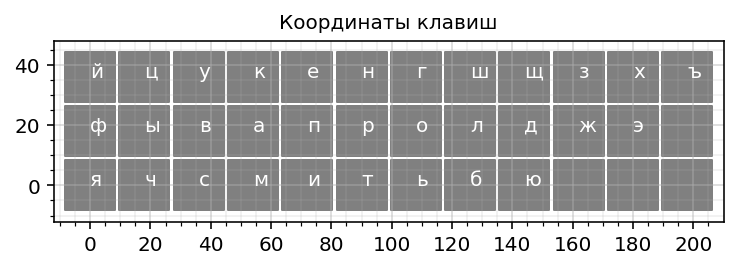

In [51]:
draw_keyboard(COORDS)

In [31]:
# x1, y1 = COORDS[0][0][0], COORDS[0][0][1]
# x2, y2 = COORDS[2][11][0], COORDS[2][11][1]

# print(calculateDistance(x1, y1, x2, y2))

## Обработка и подготовка датасета датасета

In [15]:
dialogues = pd.read_csv("datasets/dialogues.tsv", sep='\t')[['dialogue']]

In [16]:
dialogues['dialogue'] = dialogues['dialogue'].apply(cleanhtml)

In [17]:
dialogues.head()

,dialogue
0,приветрасскажиосебеприветподвкусныйкофеекнастр...
1,приветприветкакжизньотличносолнышкосветитптичк...
2,приветкакделадобрыйденьхорошочемувлекаетесьябе...
3,здравствуйтеялешаздравствуйтеяегоряучусьвкласс...
4,приветприветкактвоиделанормальноготовлюськосну...


In [18]:
sample = dialogues['dialogue'].str.cat(sep='')


In [137]:
def count_distance(coords, text, keyboard, thumbs):
    mapper = get_mapper(coords, keyboard, thumbs)
    distances = {
        'ЛМ': 0, 
        'ЛБ': 0,
        'ЛС': 0,
        'ЛУ': 0,
        'ПУ': 0,
        'ПС': 0,
        'ПБ': 0,
        'ПМ': 0,
    }
    pairs = {}
    default_position = {
        'ЛМ': coords[1][0], 
        'ЛБ': coords[1][1],
        'ЛС': coords[1][2],
        'ЛУ': coords[1][3],
        'ПУ': coords[1][6],
        'ПС': coords[1][7],
        'ПБ': coords[1][8],
        'ПМ': coords[1][9],
    }
    default_keys = {
        'ЛМ': "ф",
        'ЛБ': "ы",
        'ЛС': "в",
        'ЛУ': "а",
        'ПУ': "о",
        'ПС': "л",
        'ПБ': "д",
        'ПМ': "ж",
    }
    for idx, char in enumerate(text):
        x1 = default_position[mapper[char]['thumb']][0]
        y1 = default_position[mapper[char]['thumb']][1]

        x2 = mapper[char]['x']
        y2 = mapper[char]['y']

        substr = f"{default_keys[mapper[char]['thumb']]}{char}"
        if substr not in pairs:
            pairs[substr] = {"total": 0, "initial": 0, "back": 0, "consequent": 0}

        # Считаем нажатие из исходного положения
        distance = calculateDistance(x1, y1, x2, y2)

        pairs[substr]["total"] += distance
        pairs[substr]["initial"] += distance
        pairs[substr]["consequent"] += distance

        if idx + 1 < len(text):
            next_char = text[idx + 1]
            # Следующий символ на другом пальце, счатаем возвращение в исходное состояние
            if mapper[next_char]['thumb'] != mapper[char]['thumb']:
                distance += calculateDistance(x2, y2, x1, y1)

                pairs[substr]["total"] += distance
                pairs[substr]["back"] += distance

            if idx > 0:
                prev_char = text[idx - 1]
                substr = f"{prev_char}{char}"

                if mapper[prev_char]['thumb'] == mapper[char]['thumb']:
                    x1 = mapper[prev_char]['x']
                    y1 = mapper[prev_char]['y']
                    distance = calculateDistance(x1, y1, x2, y2)

                    if substr not in pairs:
                        pairs[substr] = {"total": 0, "initial": 0, "back": 0, "consequent": 0}

                    pairs[substr]["total"] += distance
                    pairs[substr]["consequent"] += distance

        distances[mapper[char]['thumb']] += distance
    return distances, pairs

In [138]:
distance, pairs = count_distance(COORDS, sample, QWERTY, THUMBS)
distance

{'ЛМ': 9024660.0,
 'ЛБ': 4639716.0,
 'ЛС': 17489268.0,
 'ЛУ': 60981832.153480284,
 'ПУ': 53762517.850830756,
 'ПС': 8935290.0,
 'ПБ': 5026518.0,
 'ПМ': 7373129.618033489}

In [139]:
paird_df = pd.DataFrame(pairs).transpose()

In [59]:
finger_distance_heatmap = finger_heatmap(distance)

In [60]:
finger_distance_heatmap

[[11828262.34940672,
  6337647.420447524,
  21657781.60827405,
  71501632.19042718,
  49995849.42897885,
  11455192.392446253,
  6821371.471535797,
  7373129.618033489]]

## Тепловая диаграмма дистанций, пройденных пальцами

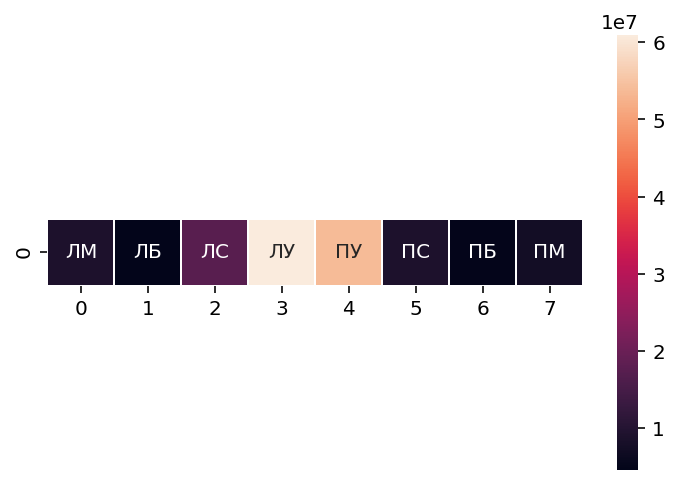

In [24]:
heat_map = sb.heatmap(finger_distance_heatmap, linewidth=.5, square=True, annot=[['ЛМ','ЛБ','ЛС','ЛУ','ПУ','ПС','ПБ','ПМ']], fmt = '')
plt.show()

In [25]:
def count_presses(text):
    press_count = {}
    for idx, char in enumerate(text):
        if char not in press_count:
            press_count[char] = 1
        else:
            press_count[char] += 1
    return press_count


In [26]:
press_count = count_presses(sample)

In [27]:
def press_heatmap(presses_counts):
    return [[presses_counts[item] if item in presses_counts else 0 for item in row] for row in QWERTY]

    

In [28]:
keypresses_heatmap = press_heatmap(press_count)

## Тепловая диаграмма нажатий

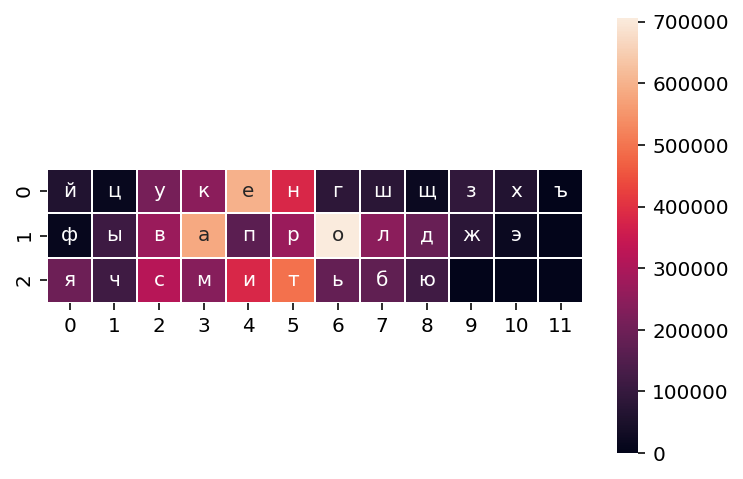

In [29]:
heat_map = sb.heatmap(keypresses_heatmap, linewidth=.5, square=True, annot=QWERTY, fmt = '')
plt.show()

## Сдвинем нижний ряд правее, чтобы разгрузить левую руку

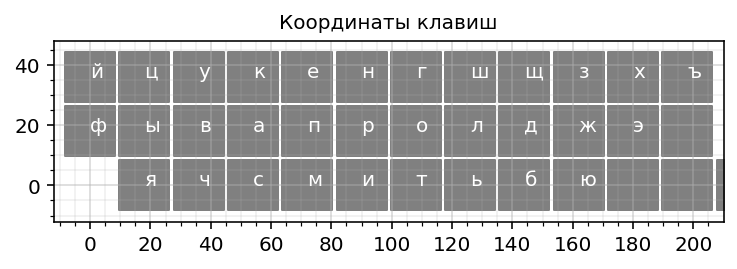

In [89]:
new_coords = shift_row(COORDS, 2, 18)
draw_keyboard(new_coords)

In [104]:
NEW_THUMBS = [
    ['ЛМ','ЛБ','ЛС','ЛУ','ЛУ','ПУ','ПУ','ПС','ПБ','ПМ','ПМ','ПМ'],
    ['ЛМ','ЛБ','ЛС','ЛУ','ЛУ','ПУ','ПУ','ПС','ПБ','ПМ','ПМ','ПМ'],
    ['ЛБ','ЛС','ЛУ','ЛУ','ПУ','ПУ','ПС','ПБ','ПМ','ПМ','ПМ','ПМ'],
]

In [91]:
distance

{'ЛМ': 11828262.34940672,
 'ЛБ': 6337647.420447524,
 'ЛС': 21657781.60827405,
 'ЛУ': 71501632.19042718,
 'ПУ': 49995849.42897885,
 'ПС': 11455192.392446253,
 'ПБ': 6821371.471535797,
 'ПМ': 7373129.618033489}

In [105]:
new_distance = count_distance(new_coords, sample, QWERTY, NEW_THUMBS)
new_distance

{'ЛМ': 2250954.0,
 'ЛБ': 7293798.0,
 'ЛС': 11167542.0,
 'ЛУ': 55737655.95415855,
 'ПУ': 55689136.6302745,
 'ПС': 8423028.0,
 'ПБ': 6686280.0,
 'ПМ': 11633655.731564235}

In [106]:
for finger, value in new_distance.items():
    print(f"{finger} - {(new_distance[finger] - distance[finger]) / 1000} м")

ЛМ - -12387.847524346531 м
ЛБ - -8325.435054531681 м
ЛС - -7041.837094733156 м
ЛУ - -26076.225747454682 м
ПУ - 12730.216674604811 м
ПС - 1082.832471235375 м
ПБ - 5987.898 м
ПМ - 4260.5261135307455 м


In [107]:
new_finger_distance_heatmap = finger_heatmap(distance)

In [108]:
new_finger_distance_heatmap

[[14638801.52434653,
  15619233.05453168,
  18209379.094733156,
  81813881.70161323,
  42958919.955669686,
  7340195.528764625,
  698382.0,
  7373129.618033489]]

## Тепловая диаграмма дистанций, пройденных пальцами НОВАЯ

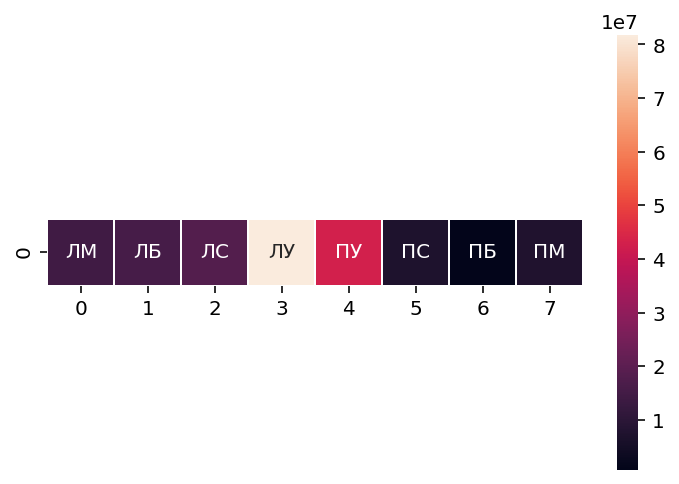

In [109]:
heat_map = sb.heatmap(new_finger_distance_heatmap, linewidth=.5, square=True, annot=[['ЛМ','ЛБ','ЛС','ЛУ','ПУ','ПС','ПБ','ПМ']], fmt = '')
plt.show()

In [71]:
press_count = count_presses(sample)